## Integrated Historical CO$_{2}$ Flux

What is the spread on integrated global CO$_{2}$ and Southern Ocean CO$_{2}$ flux? 

1. CMIP6 multi-model spread (fully coupled ESMs)
2. OMIP multi-model spread (reconstructions)

This is motivated by Nikki's figure for the IPCC:

![](https://i.ibb.co/LppydBD/Screen-Shot-2019-07-31-at-10-02-22-AM.png)

In [1]:
%matplotlib inline
import xarray as xr
import esm_analysis as ea
import glob

**CMIP6 multi-model mean**

![](https://i.ibb.co/kDLk3qM/Screen-Shot-2019-07-31-at-1-29-10-PM.png)

In [2]:
# Set of CMIP6 models with fgco2 released for r1i1p1f1
# Convert to tuple with gn or gr
fgco2_f1 = {
    'BCC': 'BCC-CSM2-MR',
    'BCC': 'BCC-ESM1',
    'CCCma': 'CanESM5',
    'IPSL': 'IPSL-CM6A-LR',
    'NCAR': 'CESM2',
    'NCAR': 'CESM2-WACCM',
    'NOAA-GFDL': 'GFDL-CM4',
    'NOAA-GFDL': 'GFDL-ESM4'    
}

In [3]:
# Set of CMIP6 models with fgco2 released for r1i1p1f2
# Although these don't offer an f1...
fgco2_f2 = {
    'CNRM-CERFACS': 'CNRM-ESM2-1',
    'MOHC': 'UKESM1-0-LL'
}

## Seasonal Weighting

Ref: http://xarray.pydata.org/en/stable/examples/monthly-means.html

In [ ]:
# Make a DataArray with the number of days in each month, size = len(time)
month_length = xr.DataArray(get_dpm(ds.time.to_index(), calendar='noleap'),
                            coords=[ds.time], name='month_length')

# Calculate the weights by grouping by 'time.season'.
# Conversion to float type ('astype(float)') only necessary for Python 2.x
weights = month_length.groupby('time.season') / month_length.astype(float).groupby('time.season').sum()

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (ds * weights).groupby('time.season').sum(dim='time')

**Just member 1 of all of them**

In [4]:
## CO2 Flux Output
# Replace with key-value pair
basepath = '/global/cscratch1/sd/cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Omon/fgco2/gn/'
# Then whatever version folder is there.
# The -1 should grab the most recent folder. Try with CanESM5.
filename = glob.glob(basepath + "**/*.nc")[-1]
fgco2 = xr.open_dataset(filename)['fgco2']

In [5]:
## Cell Area
basepath = '/global/cscratch1/sd/bradyrx/areacello/'
filename = basepath + 'areacello_BCC-CSM2-MR.nc'
areacello = xr.open_dataset(filename)['areacello']

In [6]:
fgco2 = fgco2.to_dataset()
fgco2['areacello'] = areacello
fgco2 = fgco2.reset_coords(drop=True)

In [7]:
# Units are kg / m2 / s
fgco2_int = (fgco2.fgco2 * fgco2.areacello).sum(['lat', 'lon'])

In [14]:
fac = (1/1e12) * 86400

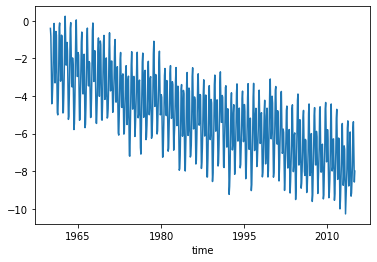

In [16]:
(fgco2_int * fac).sel(time=slice('1960', '2020')).plot()

In [ ]:
fgco2_int.plot()